# Week 20

### 3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK. https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization.

In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import pandas as pd
import numpy as np

In [2]:
paradise = nltk.corpus.gutenberg.raw('milton-paradise.txt')
len(paradise)

468220

In [3]:
print(paradise[:100])
type(paradise)

[Paradise Lost by John Milton 1667] 
 
 
Book I 
 
 
Of Man's first disobedience, and the fruit 
Of 


str

In [4]:
def words_cleanup(string):
    '''Takes in a string, returns list of lowercase words
    That eliminates stop words and punctuation'''

    # make all words lowercase
    lowercase = string.lower()

    # tokenize all of string
    lowercase_words = word_tokenize(lowercase)

    # eliminate stop words
    nltk.download('stopwords')
    stop_words = set(nltk.corpus.stopwords.words('english'))
    
    
    # new list that has no stop words
    filtered_list = [w for w in lowercase_words if w not in stop_words]
    
    # list that has no punctuation
    clean_words = [w for w in filtered_list if w.isalpha()]
    
    return clean_words

paradise_words = words_cleanup(paradise)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matheusmythe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### I chose lemmitization because it considers the word in context to get to the word's base.  Stemming does not consider this.  However, with the 'older'  and perhaps more formal language of Paradise Lost, it's hard to say how well lemmitization works.

In [5]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

paradise_lem = [lemmatizer.lemmatize(w) for w in paradise_words]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matheusmythe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# after running this once, taking out less meaningful words
paradise_lem = [w for w in paradise_lem if w not in ['thou', 'thy', 'thee', 'thus', 'u']]

In [7]:
# create Frequency Dictionary
from nltk import FreqDist
paradise_freq = FreqDist(paradise_lem)

In [8]:
paradise_top20 = paradise_freq.most_common(20)
print(paradise_top20)

x = [t[0] for t in paradise_top20]
y = [t[1] for t in paradise_top20]

[('heaven', 425), ('god', 307), ('shall', 283), ('yet', 228), ('though', 217), ('earth', 215), ('man', 174), ('first', 169), ('day', 151), ('high', 149), ('one', 141), ('son', 132), ('far', 128), ('death', 127), ('may', 126), ('power', 125), ('great', 123), ('world', 119), ('till', 119), ('thing', 116)]


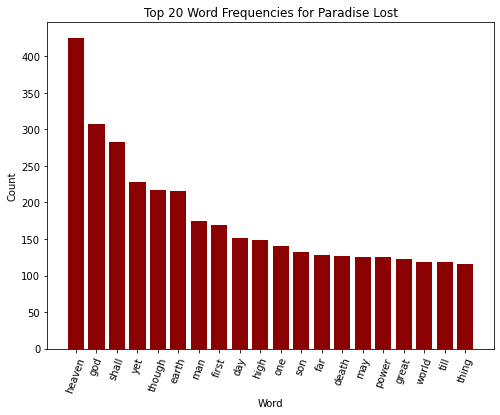

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(x, height=y, color='darkred')
plt.title('Top 20 Word Frequencies for Paradise Lost')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

### 4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. 

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matheusmythe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Read in Paradise Lost as sentences
paradise = nltk.corpus.gutenberg.sents('milton-paradise.txt')

# helper function to create a string from the token sentences
def to_list_sentences(sentences):
    #takes in a list of lists
    sentence_list = []
    #for each list 
    for sentence in sentences:
        sentence_string =''
        # for each word in the list
        for word in sentence:
            sentence_string += ' ' + word
        temp = []
        temp.append(sentence_string)
        sentence_list.append(temp)
    return sentence_list

# make every sentence it's own string for sentiment analysis
paradise_sent = to_list_sentences(paradise)
print(paradise_sent[:5])

[[' [ Paradise Lost by John Milton 1667 ]'], [' Book I'], [" Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme ."], [" And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; thou from the first Wast present , and , with mighty wings outspread , Dove - like sat ' st brooding on the 

In [12]:
len(paradise_sent)

1851

In [13]:
# making a list of dictionaries that have the sentiments saved and 
# associated with the sentence
sentiments=[]
for sentence in paradise_sent:
    # must call sentence[0] becuase each sentence is a list with one sentence
    sentiment = analyzer.polarity_scores(sentence[0])
    #print(sentiment)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    sentiments.append({
                "text":sentence[0],
                "compound":compound,
                "positive":pos,
                "negative":neg,
                "neutral":neu
    })
#sentiments

In [14]:
sentiments[:6:2]

[{'text': ' [ Paradise Lost by John Milton 1667 ]',
  'compound': 0.4404,
  'positive': 0.4,
  'negative': 0.219,
  'neutral': 0.381},
 {'text': " Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .",
  'compound': 0.8885,
  'positive': 0.192,
  'negative': 0.117,
  'neutral': 0.691},
 {'text': ' Say first -- for Heaven hides nothing from thy view , Nor th

In [15]:
df = pd.DataFrame(sentiments)
df.head()

,text,compound,positive,negative,neutral
0,[ Paradise Lost by John Milton 1667 ],0.4404,0.400,0.219,0.381
1,Book I,0.0000,0.000,0.000,1.000
2,"Of Man ' s first disobedience , and the fruit...",0.8885,0.192,0.117,0.691
3,"And chiefly thou , O Spirit , that dost prefe...",0.7331,0.163,0.085,0.752
4,Say first -- for Heaven hides nothing from th...,0.8689,0.239,0.093,0.668


In [16]:
df.describe()

,compound,positive,negative,neutral
count,1851.000000,1851.000000,1851.000000,1851.000000
mean,0.146361,0.150328,0.115088,0.732953
std,0.632738,0.137675,0.134717,0.170586
min,-0.995200,0.000000,0.000000,0.000000
25%,-0.401900,0.033500,0.000000,0.631000
50%,0.144500,0.132000,0.077000,0.736000
75%,0.765000,0.227000,0.184000,0.843000
max,0.997300,1.000000,1.000000,1.000000


### First 5 most negative sentences

In [17]:
df.nlargest(5, columns=['negative'], keep='first')

,text,compound,positive,negative,neutral
153,No !,-0.3595,0.0,1.000,0.000
512,O Hell !,-0.7088,0.0,1.000,0.000
1689,Alas !,-0.3382,0.0,1.000,0.000
478,Me miserable !,-0.5411,0.0,0.777,0.223
175,Sad cure !,-0.5255,0.0,0.772,0.228


### First 5 most positive sentences

In [18]:
df.nlargest(7, columns=['positive'], keep='first')

# O friends and O Heaven repeat

,text,compound,positive,negative,neutral
605,O friends !,0.5255,1.000,0.0,0.000
828,O Heaven !,0.5562,1.000,0.0,0.000
908,O Friends !,0.5255,1.000,0.0,0.000
1441,O Heaven !,0.5562,1.000,0.0,0.000
1233,"She fair , divinely fair , fit love for Gods !",0.9381,0.838,0.0,0.162
1142,"Be strong , live happy , and love !",0.9098,0.793,0.0,0.207
626,Courageous Chief !,0.5707,0.787,0.0,0.213


### First 5 most neutral sentences

***However, there are 224 sentences that were rated 1.0 - the highest neutral rating.***

In [19]:
df.nlargest(5, columns=['neutral'], keep='first')

,text,compound,positive,negative,neutral
1,Book I,0.0,0.0,0.0,1.0
13,Oh how unlike the place from whence they fell !,0.0,0.0,0.0,1.0
27,But see !,0.0,0.0,0.0,1.0
33,"Him , haply slumbering on the Norway foam , T...",0.0,0.0,0.0,1.0
37,Such resting found the sole Of unblest feet .,0.0,0.0,0.0,1.0


In [20]:
neutral_text = df[df['neutral'] == 1.0]

In [21]:
neutral_text

,text,compound,positive,negative,neutral
1,Book I,0.0,0.0,0.0,1.0
13,Oh how unlike the place from whence they fell !,0.0,0.0,0.0,1.0
27,But see !,0.0,0.0,0.0,1.0
33,"Him , haply slumbering on the Norway foam , T...",0.0,0.0,0.0,1.0
37,Such resting found the sole Of unblest feet .,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1828,"Who then shall guide His people , who defend ?",0.0,0.0,0.0,1.0
1837,He ended ; and thus Adam last replied .,0.0,0.0,0.0,1.0
1838,"How soon hath thy prediction , Seer blest , M...",0.0,0.0,0.0,1.0
1842,To whom thus also the Angel last replied .,0.0,0.0,0.0,1.0


***The most neutral 224 sentences.***

In [22]:
list(neutral_text['text'])

[' Book I',
 ' Oh how unlike the place from whence they fell !',
 ' But see !',
 ' Him , haply slumbering on the Norway foam , The pilot of some small night - foundered skiff , Deeming some island , oft , as seamen tell , With fixed anchor in his scaly rind , Moors by his side under the lee , while night Invests the sea , and wished morn delays .',
 ' Such resting found the sole Of unblest feet .',
 ' With these came they who , from the bordering flood Of old Euphrates to the brook that parts Egypt from Syrian ground , had general names Of Baalim and Ashtaroth -- those male , These feminine .',
 ' Thither , winged with speed , A numerous brigade hastened : as when bands Of pioneers , with spade and pickaxe armed , Forerun the royal camp , to trench a field , Or cast a rampart .',
 ' Soon had his crew Opened into the hill a spacious wound , And digged out ribs of gold .',
 ' Their summons called From every band and squared regiment By place or choice the worthiest : they anon With hundr

In [23]:
df['text'].nunique()

1841

### 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

The scoring for sentiment analysis leaves something to be desired.  For example, the following sentences were labeled neutral:

* ' O Conscience !'
* ' Out of my sight , thou Serpent !'
* ' O foul descent !'
* ' Because thou hast done this , thou art accursed Above all cattle , each beast of the field ; Upon thy belly groveling thou shalt go , And dust shalt eat all the days of thy life .'

The above sentences should have some negative sentiment.

The two largest challenges in correctly labeling sentiment from Paradise Lost are the age of text (released in 1667) and the poetic structure.  Both the age and structure are enough to not work well with Vader.

Sentiment analysis is already difficult for texts less than 25 years old. Satire, sarcasm, and other nuances of the english language are difficult to capture and categorize.  The english language has changed substantially since the 1660s.